This is an introduction to evolutionary computation in Python with NumPy.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random as rdm

In [12]:
class Mutation:
    def __init__(self, value, fit):
        self.value = value
        self.fit = fit

    def __gt__(self, mutation2):
        return self.fit > mutation2.fit

    def __str__(self):
        return "Mutation-Fitness: " + str(self.fit)

def sphere(value):
    return np.dot(value.T, value)

def crossover(parent1, parent2):
    return (parent1.value + parent2.value) / 2


In [13]:
n = 5
x = 2 * np.ones(n)

The first generation is: Mutation-Fitness: 14.101446330030116, Mutation-Fitness: 17.92200737062853, Mutation-Fitness: 19.209946575526242, Mutation-Fitness: 43.85721560764097, Mutation-Fitness: 31.541527317135007, Mutation-Fitness: 41.901543507880135, Mutation-Fitness: 25.388185047317013, Mutation-Fitness: 16.777317419556677, Mutation-Fitness: 45.62067547429547, Mutation-Fitness: 34.89948505941858, Mutation-Fitness: 14.385620843740373, Mutation-Fitness: 40.279674800828495, Mutation-Fitness: 13.017990402303202, Mutation-Fitness: 25.86843263966763, Mutation-Fitness: 39.4469527673789, Mutation-Fitness: 39.67292428133558, Mutation-Fitness: 37.51270541351563, Mutation-Fitness: 10.602207890281074, Mutation-Fitness: 15.494747381473427



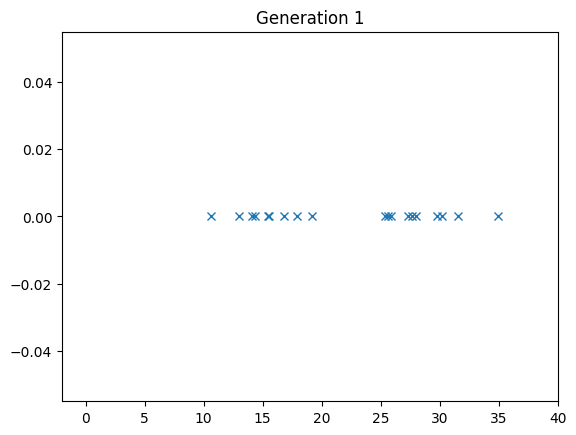

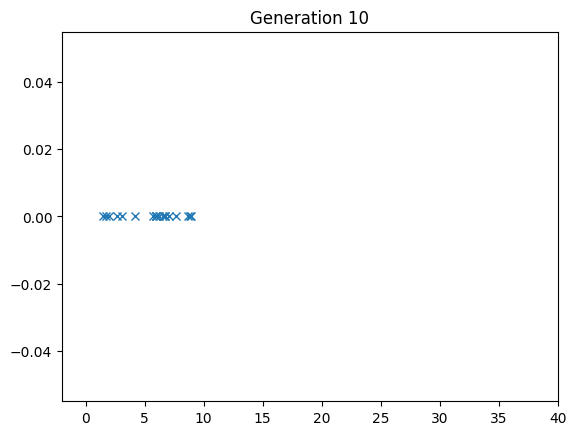

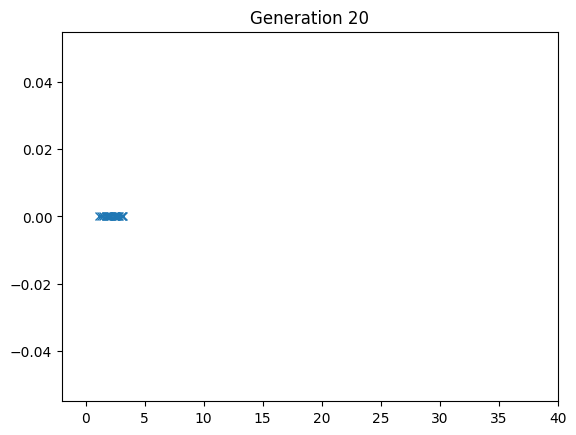

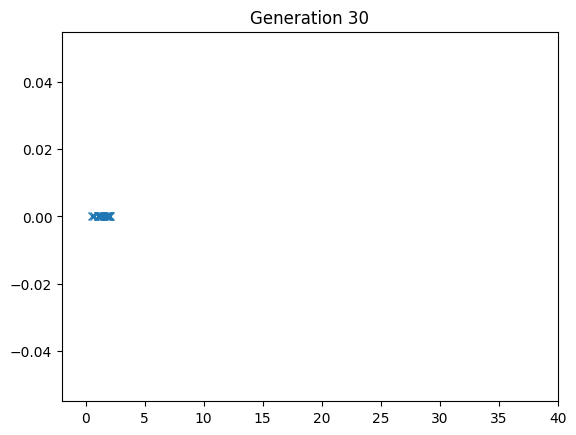

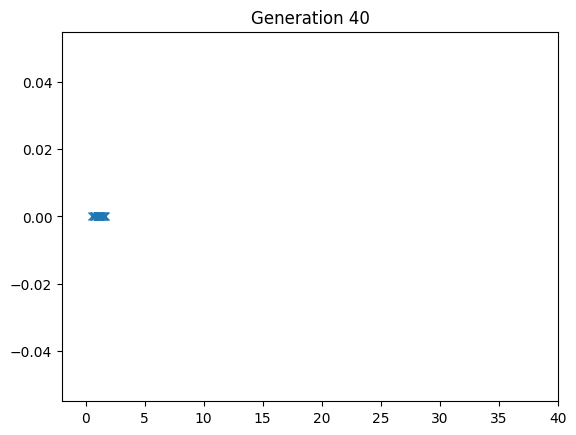

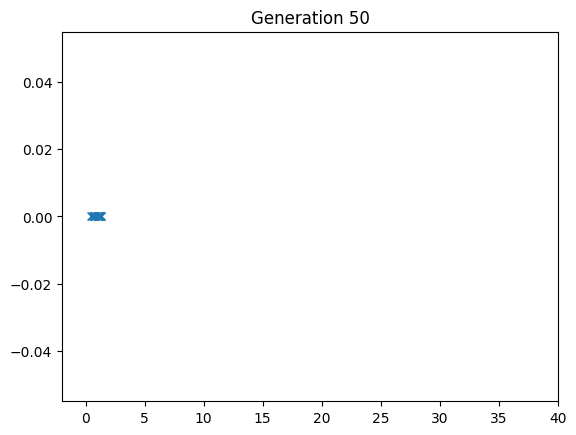

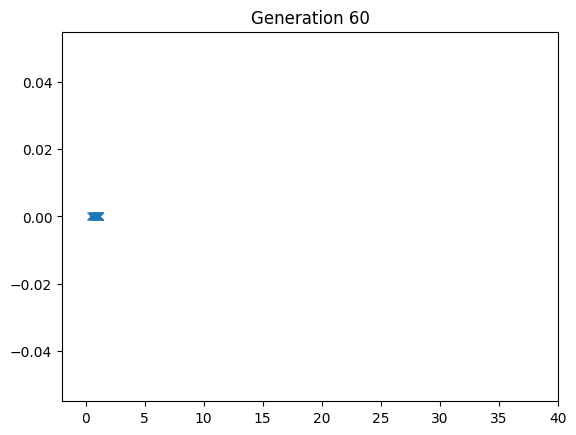

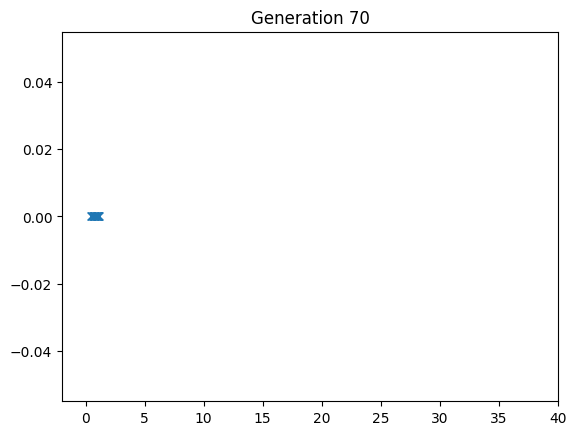

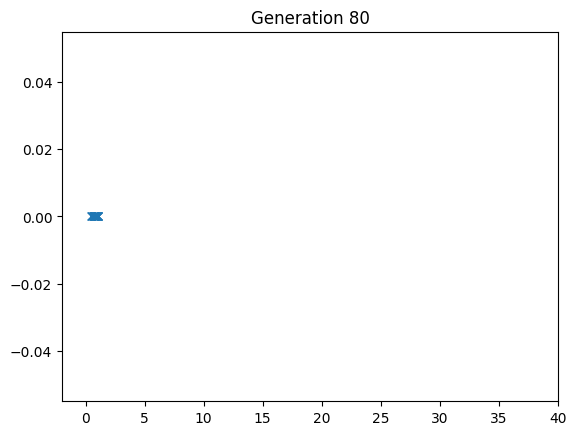

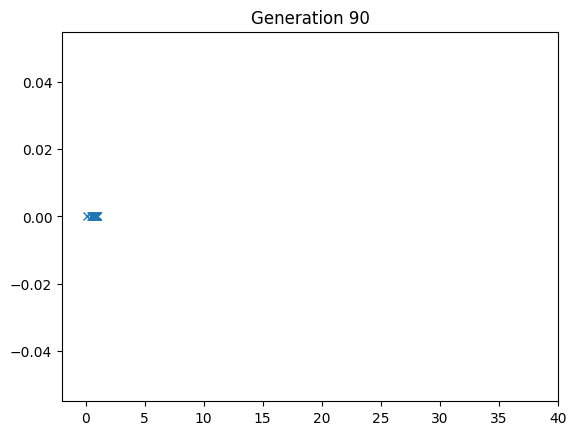

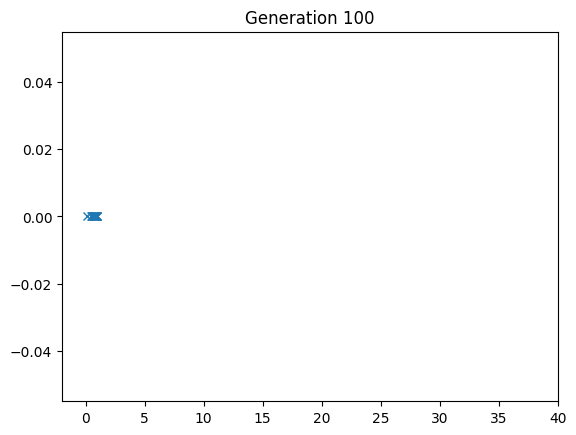

KeyboardInterrupt: 

In [14]:
generation = 1
sigma = 1.0
parents_mue = 20
mutations_lambda = 10
population = []

# Generate initial mue parents for population
for i in range(1, parents_mue):
    x_ = x + sigma * np.random.randn(n)
    fitness = sphere(x_)

    mutation = Mutation(x_, fitness)
    population.append(mutation)
print("The first generation is:", ", ".join([str(m) for m in population]))
print()

# Compute 100 generations
while generation <= 100:
    # Crossover with 2 parents (p=2) and intermediate recombination by mean value (repeat for lambda number of mutations)
    for i in range(1, mutations_lambda):
        first_parent = rdm.randrange(len(population))
        second_parent = rdm.randrange(len(population))
        mean_value = crossover(population[first_parent], population[second_parent])
        # Mutation
        mean_value_ = mean_value + sigma * np.random.randn(n)
        fitness_ = sphere(mean_value_)

        mutation = Mutation(mean_value_, fitness_)
        population.append(mutation)

    # TODO: Try to implement Rechenberg with a 5-step generation window (larger than 1/5 with s/gen-window)
    # TODO: Reset the success counter to empty after 5 steps to do it again

    # Now select the best (minimal) mue parents/mutations out of complete population (parent + mutations)
    population.sort()
    population = population[:parents_mue - 1]

    # Show actual distribution of fitness among population
    if generation == 1 or generation % 10 == 0:
        plt.plot([p.fit for p in population], np.zeros_like(population), 'x')
        plt.xlim(-2, 40)
        plt.title('Generation ' + str(generation))
        plt.show()

    generation += 1

# Return the last generation
print("The last generation is:", ", ".join([str(m) for m in population]))